In [190]:
import os
os.chdir('C:/Users/bruno/Documents/Simulação e Modelos/Python_simulação')
import pandas as pd
from scipy.stats import zscore
import numpy as np
import sympy as sy

In [11]:
df = pd.read_csv('exe_5.csv')

In [13]:
df.describe()

,Quantidade de caixas
count,200.000000
mean,19428.055000
std,10121.629093
min,2007.000000
25%,12007.250000
50%,18506.000000
75%,26090.750000
max,62758.000000


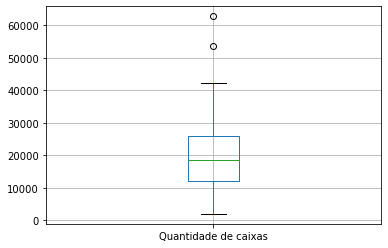

In [15]:
df.boxplot(column=['Quantidade de caixas']);

In [38]:
#remoção de outliers - método do quartil
quartil_1 = df['Quantidade de caixas'].quantile(.25)
quartil_3 = df['Quantidade de caixas'].quantile(.75)
Intervalo_inferior = quartil_1-3*(quartil_3-quartil_1)
Intervalo_superior = quartil_3+3*(quartil_3-quartil_1)
new_df_1 = df[df['Quantidade de caixas'].between(Intervalo_inferior, Intervalo_superior)]

In [39]:
#remoção de outliers - método z-score
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df_2 = df[filtered_entries]

In [220]:
mu = np.mean(new_df_2)
sigma = np.std(new_df_2)
# Plot the distribution curve

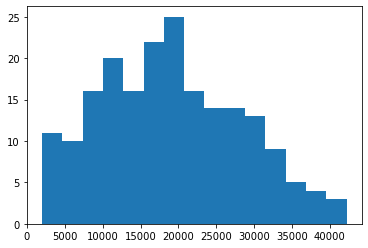

In [107]:
count, bins, ignored = plt.hist(new_df_2, 15)

In [250]:
from scipy.integrate import quad

def f(x):
    return 1/(sigma * np.sqrt(2 * np.pi))*sy.exp(-(x - mu)**2 / (2 * sigma**2))

def normal(mu,sigma, bins):
    return [1/(sigma * np.sqrt(2 * np.pi))*np.exp(-(bin - mu)**2 / (2 * sigma**2)) for bin in bins]

def cumnormal(mu, sigma, bins):
    bins_cum = []
    for bin_ in bins:
        cum = 0
        for i in np.arange(0, bin_, bin_/1000):
            cum+= 1/(sigma * np.sqrt(2 * np.pi))*np.exp(-(i - mu)**2 / (2 * sigma**2))
        bins_cum.append(cum)
    return bins_cum

def cumnormal_int(mu, sigma, bins):
    bins_cum = []
    for bin_ in bins:
        cum, err = quad(f, 0, bin_)
        bins_cum.append(cum)
    return bins_cum

In [285]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

stat, p = shapiro(new_df_2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Amostra segue uma distribuição normal (falha ao rejeitar H0)')
else:
    print('Amostra não segue uma distribuição normal (rejeita H0)')

Statistics=0.982, p=0.011
Amostra não segue uma distribuição normal (rejeita H0)


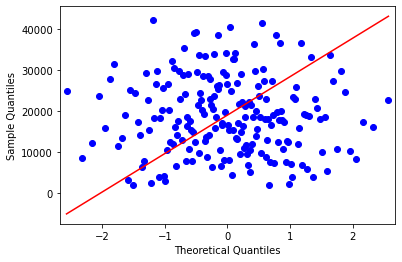

In [85]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(new_df_2, line='s')
pyplot.show()

In [ ]:
#teste qui-quadrado
teorico = []
for i in range(len(bins)-1):
    t= np.abs((cumnormal_int(mu,sigma, bins)[i+1]-cumnormal_int(mu,sigma, bins)[i]))*200
    teorico.append(t)
    

In [278]:
from scipy.stats.mstats import chisquare 
statistic, pvalue = chisquare(count, teorico)
if pvalue>0.05:
    print(f'Com um pvalue {round(pvalue,2)}, não rejeitamos a hipótese de que a frequência observada é normal')
else:
    print(f'Com um pvalue {round(pvalue,2)}, rejeitamos a hipótese de que a frequência observada é normal')

Com um pvalue 0.5, não rejeitamos a hipótese de que a frequência observada é normal


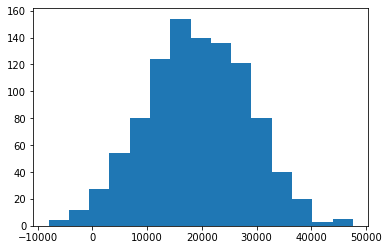

In [125]:
simulacao = np.random.normal(mu, sigma, 100)
plt.hist(simulacao, 15);